In [2]:
%reload_ext memory_profiler
import autograd.numpy as anp
from qoc import grape_schroedinger_discrete
from qoc.standard import (TargetStateInfidelity,
                          conjugate_transpose,
                          get_annihilation_operator,
                          get_creation_operator,
                          SIGMA_Z,
                          generate_save_file_path, )
from memory_profiler import profile
import numpy as np

from qutip import (qsave,qload)
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix
%matplotlib inline

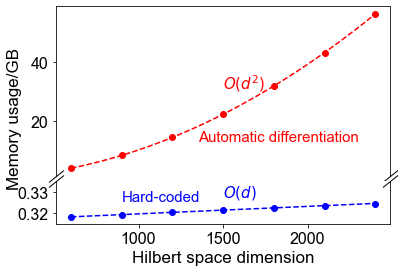

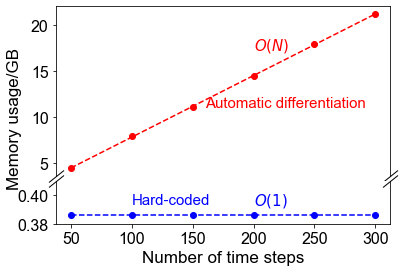

In [9]:
AD='Automatic differentiation'
Analytical = 'Hard-coded'
def plot_Nfixed(h_dim,N,memory_ma,memory_ad):
    x = (np.array(h_dim))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
    fit = np.polyfit(x**2, memory_ad, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(600,2400,200)
    y=a*np.power(xx**2,1)+b
    ax1.plot(xx,y,'--',color='red',label=AD)
    ax1.scatter(x,memory_ad,color='red')
    fit = np.polyfit(x, memory_ma, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(600,2400,200)
    y=a*np.power(xx,1)+b
    ax2.plot(xx,y,'--',color='blue',label=Analytical)
    ax2.scatter(x,memory_ma,color='blue')
    ax1.set_ylim()  # 子图1设置y轴范围，只显示部分图
    ax2.set_ylim(0.315,0.335)  # 子图2设置y轴范围，只显示部分图
    ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
    ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
    ax1.tick_params(bottom=False)
    ax2.set_ylabel('Memory usage/GB')
    ax2.set_xlabel('Hilbert space dimension')
    ax1.annotate(AD,
      xy     = (     x[1], memory_ad[1]),
      xytext = (1.5*x[1], 1.6*memory_ad[1]),
      color  = 'red',fontsize=15)
    ax2.annotate(Analytical,
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.02*memory_ma[1]),
      color  = 'blue',fontsize=15)
    ax1.annotate('$O(d^2)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.4*memory_ad[3]),
      color  = 'red',fontsize=15)
    ax2.annotate('$O(d)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.02*memory_ma[3]),
      color  = 'blue',fontsize=15)
    ax2.yaxis.set_label_coords(-0.11, 2.5)
    plt.subplots_adjust(hspace=.05)
    d = .8  #设置倾斜度
    #绘制断裂处的标记
    
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    ax1.xaxis.label.set_size(17)
    ax1.yaxis.label.set_size(17)
    ax2.xaxis.label.set_size(17)
    ax2.yaxis.label.set_size(17)
    ax1.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.yaxis.set_label_coords(-0.1, 2.5)
    plt.show()
    fig.savefig('state_memory_Nfixed.pdf',bbox_inches='tight')
    plt.close(fig)
N=40
h_dims=6*np.array([100,150,200,250,300,350,400])
state_ma_N=np.array([303.38,304.55,305.57,306.58,307.55,308.5,309.49])/953.674316
state_ad_N=np.array([3697.56,7880.95,13740.15,21224.06,30403.06,41248.79,53763.30])/953.674316
plot_Nfixed(h_dims,N,state_ma_N,state_ad_N)

N_=[50,100,150,200,250,300]
h_dim=600
memory_ma=np.array([368.05,368.05,368.06,368.05,368.05,368.05])/953.674316
memory_ad=np.array([4251.35,7554.06,10628.58,13803.88,17099.93,20199.55])/953.674316
x = np.array(N_)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
fit = np.polyfit(x, memory_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(50,300,200)
y=a*np.power(xx,1)+b
ax1.plot(xx,y,'--',color='red',label=AD)
ax1.scatter(x,memory_ad,color='red')
fit = np.polyfit(x, memory_ma, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(50,300,200)
y=a*np.power(xx,1)+b
ax2.plot(xx,y,'--',color='blue',label=Analytical)
ax2.scatter(x,memory_ma,color='blue')
ax1.set_ylim()  # 子图1设置y轴范围，只显示部分图
ax2.set_ylim((0.38,0.41))  # 子图2设置y轴范围，只显示部分图
ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
ax1.annotate(AD,
      xy     = (     x[1], memory_ad[1]),
      xytext = (1.6*x[1], 1.4*memory_ad[1]),
      color  = 'red',fontsize=15)
ax2.annotate(Analytical,
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.02*memory_ma[1]),
      color  = 'blue',fontsize=15)
ax1.annotate('$O(N)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.2*memory_ad[3]),
      color  = 'red',fontsize=15)
ax2.annotate('$O(1)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.02*memory_ma[3]),
      color  = 'blue',fontsize=15)
ax1.tick_params(bottom=False)
ax2.set_ylabel('Memory usage/GB')
ax2.set_xlabel('Number of time steps')
ax1.xaxis.label.set_size(17)
ax1.yaxis.label.set_size(17)
ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)
ax1.tick_params(axis ='both', 
               labelsize = 16, )
ax2.tick_params(axis ='both', 
               labelsize = 16, )
ax2.yaxis.set_label_coords(-0.1, 2.5)
plt.subplots_adjust(hspace=.05)
d = .8  #设置倾斜度
    #绘制断裂处的标记
    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
fig.savefig('state_memory_lfixed.pdf',bbox_inches='tight')
plt.show()

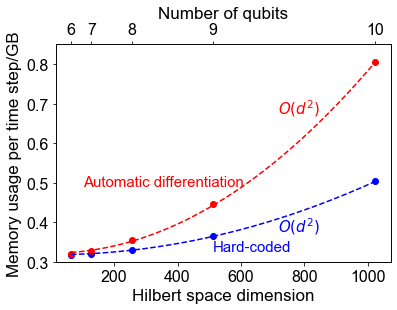

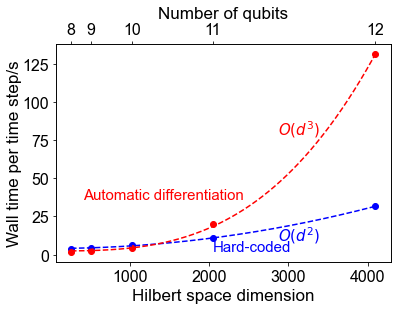

In [19]:
import numpy as np
dim=2**np.array([6,7,8,9,10])
time_ad=np.array([1.8,2.22,4.01,20.08,130.95])
time_ma=np.array([3.75,4.39,5.95,11.18,31.54])
mem_ma=np.array([303.27,305.59,314.06,347.52,479.71])/953.674316
mem_ad=np.array([304.51,311.83,339.02,425.22,767])/(953.674316)

fig, ax1 = plt.subplots()

x = (np.array(dim))**1
fit = np.polyfit(dim**2, mem_ma, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**6,2**10,200)
y=(a*np.power(xx,2)+b)
ax1.plot(xx, y, '--',color='blue', label = 'Manual')
ax1.scatter(x, mem_ma, color='blue')
ax1.annotate(Analytical,
      xy     = (     x[3], mem_ma[3]),
      xytext = (x[3], 0.9*mem_ma[3]),
      color  = 'blue',fontsize=15)
ax1.annotate(AD,
      xy     = (     x[3], mem_ad[3]),
      xytext = (0.2*x[3], 1.1*mem_ad[3]),
      color  = 'red',fontsize=15)
ax1.annotate('$O(d^2)$',
      xy     = (     x[4], mem_ma[4]),
      xytext = (0.7*x[4], 0.75*mem_ma[4]),
      color  = 'blue',fontsize=15)
ax1.annotate('$O(d^2)$',
      xy     = (     x[4], mem_ad[4]),
      xytext = (0.7*x[4], 0.84*mem_ad[4]),
      color  = 'red',fontsize=15)
ax1.set_ylim(0.3,0.85)
fit = np.polyfit(dim**2, mem_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**6,2**10,200)
y=(a*np.power(xx,2)+b)
ax1.plot(xx, y,'--', color='red', label = 'Auto-grad')
ax1.scatter(x, mem_ad, color='red')
ax1.set_ylabel ( "Memory usage per time step/GB")
ax1.set_xlabel ('Hilbert space dimension')

    
ax1.yaxis.set_label_coords(-0.08, 0.5)
ax3 = ax1.twiny()
ax3.set_xlabel ('Number of qubits')
ax3.plot(2**np.array([6,7,8,9,10]),mem_ma,alpha=0)
plt.xticks([2**6,2**7,2**8,2**9,2**10], ["6", "7", "8","9","10"])
ax3.tick_params(axis ='both', 
               labelsize = 16, )
ax3.xaxis.label.set_size(17)
ax3.yaxis.label.set_size(17)
ax1.tick_params(axis ='both', 
               labelsize = 16, )
ax1.xaxis.label.set_size(17)
ax1.yaxis.label.set_size(17)

ax1.yaxis.set_label_coords(-0.10, 0.5)
plt.show()
fig.savefig('gate_memory.pdf',bbox_inches='tight')




fig, ax2 = plt.subplots()
x=2**np.array([8,9,10,11,12])
fit = np.polyfit(x**2, time_ma, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**8,2**12,200)
y=(a*np.power(xx,2)+b)
ax2.plot(xx, y, '--',color='blue', label = 'Manual')
ax2.scatter(x, time_ma, color='blue')
ax2.annotate('$O(d^2)$',
      xy     = (     x[-1], time_ma[-1]),
      xytext = (0.7*x[-1], 0.3*time_ma[-1]),
      color  = 'blue',fontsize=15)
ax2.annotate('$O(d^3)$',
      xy     = (     x[-1], time_ad[-1]),
      xytext = (0.7*x[-1], 0.6*time_ad[-1]),
      color  = 'red',fontsize=15)
ax2.annotate(Analytical,
      xy     = (     x[3], time_ma[3]),
      xytext = (x[3], 0.2*time_ma[3]),
      color  = 'blue',fontsize=15)
ax2.annotate(AD,
      xy     = (     x[3], time_ad[3]),
      xytext = (0.2*x[3], 1.8*time_ad[3]),
      color  = 'red',fontsize=15)
fit = np.polyfit(x**3, time_ad, 1)
a=fit[0]
b=fit[1]
xx=np.linspace(2**8,2**12,200)
y=a*np.power(xx**3,1)+b
ax2.plot(xx, y,'--', color='red', label = 'Auto-grad')
ax2.scatter(x, time_ad, color='red')
ax2.set_ylabel ( "Wall time per time step/s")
ax2.set_xlabel ('Hilbert space dimension')


ax2.xaxis.label.set_size(17)
ax2.yaxis.label.set_size(17)
ax2.tick_params(axis ='both', 
           labelsize = 16, )
ax3 = ax2.twiny()
ax3.set_xlabel ('Number of qubits')
ax3.scatter(2**np.array([8,9,10,11,12]),time_ad,alpha=0)
plt.xticks([2**8,2**9,2**10,2**11,2**12], ["8", "9", "10","11","12"])

ax3.tick_params(axis ='both', 
               labelsize = 16, )
ax3.xaxis.label.set_size(17)
ax3.yaxis.label.set_size(17)
ax2.yaxis.set_label_coords(-0.10, 0.5)   
plt.show()
fig.savefig('gate_time.pdf',bbox_inches='tight')
    


[ 248.71  453.14  760.07 1183.   1742.  ]
6.0 4.0


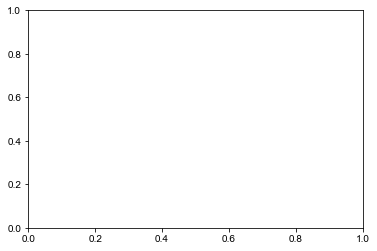

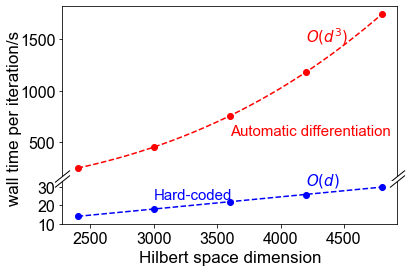

In [18]:
def plot_time(dim,memory_ma,memory_ad):
    x=np.array(dim)**1
    print(memory_ad)
    fig, ax = plt.subplots()
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [4, 1]})
    fit = np.polyfit(dim**3, memory_ad, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(2400,4800,200)
    y=a*np.power(xx,3)+b
    ax1.plot(xx,y,'--',color='red',label=AD)
    ax1.scatter(x,memory_ad,color='red')
    fit = np.polyfit(dim, memory_ma, 1)
    a=fit[0]
    b=fit[1]
    xx=np.linspace(2400,4800,200)
    y=a*np.power(xx,1)+b
    ax2.plot(xx,y,'--',color='blue',label=Analytical)
    ax2.scatter(x,memory_ma,color='blue')
    ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
    ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
    ax1.tick_params(bottom=False)
    ax1.annotate(AD,
      xy     = (     x[1], memory_ad[1]),
      xytext = (1.2*x[1], 1.25*memory_ad[1]),
      color  = 'red',fontsize=15)
    ax2.annotate(Analytical,
      xy     = (     x[1], memory_ma[1]),
      xytext = (x[1], 1.3*memory_ma[1]),
      color  = 'blue',fontsize=15)
    ax1.annotate('$O(d^3)$',
      xy     = (     x[3], memory_ad[3]),
      xytext = (x[3], 1.25*memory_ad[3]),
      color  = 'red',fontsize=15)
    ax2.annotate('$O(d)$',
      xy     = (     x[3], memory_ma[3]),
      xytext = (x[3], 1.2*memory_ma[3]),
      color  = 'blue',fontsize=15)
    ax2.set_ylim(10,33)
    ax2.set_ylabel('wall time per iteration/s')
    ax2.set_xlabel('Hilbert space dimension')
    ax2.yaxis.set_label_coords(-0.08, 2.5)
    plt.subplots_adjust(hspace=.05)
    d = .8  #设置倾斜度
    #绘制断裂处的标记
    
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='black', mec='black', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
    ax1.xaxis.label.set_size(17)
    ax1.yaxis.label.set_size(17)
    ax2.xaxis.label.set_size(17)
    ax2.yaxis.label.set_size(17)
    ax1.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.tick_params(axis ='both', 
               labelsize = 16, )
    ax2.yaxis.set_label_coords(-0.12, 2.5)
    plt.savefig('stat_time.pdf',bbox_inches='tight')
    fig_width, fig_height = plt.gcf().get_size_inches()
    print(fig_width, fig_height)
    plt.show()
dim=6*np.array([400,500,600,700,800])
time_ad=np.array([248.71,453.14,760.07,1183,1742])

time_ma=np.array([14.05,17.99,21.82,25.83,29.96])
plot_time(dim,time_ma,time_ad)


In [5]:
from qutip import qload
sc,new,sc1,new1=qload('qubits')
import numpy as np
from scipy.sparse.linalg import expm_multiply,eigs
from scipy.special import factorial
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix,identity
from fractions import Fraction
from scipy.sparse import csr_matrix,isspmatrix,bmat,kron
import scipy as sci
from scipy.sparse import csr_matrix,isspmatrix,bmat
import scipy as sci
def get_creation_operator(size,tp):
    return np.diag(np.sqrt(np.arange(1, size),dtype=tp), k=-1)
def get_annihilation_operator(size,tp):
    return np.diag(np.sqrt(np.arange(1, size),dtype=tp), k=1)
def get_norm(dim):
    tp=np.float64
    anorm=[]
    for i in range(len(dim)):
        N=dim[i]
        control=get_control(N,tp)
        control_pra=0.5*np.ones(np.array(control).shape[0])
        H_control=control_H(control_pra,control)
        H=H_control+get_int(N,tp)
        anorm.append(overnorm(H))
    return anorm
def get_norm_der(dim):
    tp=np.float64
    anorm=[]
    for i in range(len(dim)):
        N=dim[i]
        control=get_control(N,tp)
        control_pra=0.5*np.ones(np.array(control).shape[0])
        H_control=control_H(control_pra,control)
        H=H_control+get_int(N,tp)
        vec=1/np.sqrt(2*2**N)*np.identity(2*2**N)
        A=block_fre(H,-1j*(control[0]))
        anorm.append(overnorm(A))
    return anorm
def get_int(N,tp):
    sigmap=get_creation_operator(2,tp)
    sigmam = get_annihilation_operator(2,tp)
    sigmaz=sigmap.dot(sigmam)
    H0=0
    SIGMAZ=kron(sigmaz,sigmaz)
    H0=H0+kron(SIGMAZ,identity(2**(N-2)))+kron(identity(2**(N-2)),SIGMAZ)
    for i in range(1,N-2):
        H0=H0+kron(kron(identity(2**i),SIGMAZ),identity(2 ** (N - 2 - i)))
    return H0
def get_control(N,tp):
    sigmap=get_creation_operator(2,tp)
    sigmam = get_annihilation_operator(2,tp)
    sigmap=sigmap
    sigmam=sigmam
    sigmax=sigmap+sigmam
    sigmay=-1j*sigmap+1j*sigmam
    control=[]
    if N==1:
        control.append(kron(sigmax, identity(2 ** (N - 1))))
        control.append(kron(sigmay, identity(2 ** (N - 1))))
        return control
    else:
        a=identity(2**(N-1))
        control.append(kron(sigmax,a,format="csc"))
        control.append(kron(sigmay, identity(2 ** (N - 1)),format="csc"))
        for i in range(1,N-1):
            control.append(kron(kron(identity(2**i),sigmax), identity(2 ** (N - 1-i)),format="csc"))
            control.append(kron(kron(identity(2 ** i), sigmay), identity(2 ** (N - 1 - i)),format="csc"))
        control.append(kron(identity(2**(N-1)),sigmax,format="csc"))
        control.append(kron(identity(2**(N-1)),sigmay,format="csc"))
    return control
def control_H(control,H_control):
    H=0
    for i in range(len(control)):
        H=H+control[i]*H_control[i]
    return H
def get_H(N,tp):
    control=get_control(N,tp)
    control_pra=0.5*2*np.pi*np.ones(np.array(control).shape[0])
    H_control=control_H(control_pra,control)
    H=-1j*(H_control+get_int(N,tp)*0.1*2*np.pi)
def overnorm(A):
    if A.dtype==np.complex256:
        return _exact_inf_norm(A)
    else:
        return norm_two(A)
def norm_two(A):
    if sci.sparse.isspmatrix(A):
        A=csr_matrix(A).conjugate().transpose()
        return np.sqrt(abs(eigs(A=A.dot(A),k=1,which='LM',return_eigenvectors=False)[0]))
    else:
        return np.linalg.norm(A)
def block_fre(A,E):
    if isspmatrix(A) is False:
        A = np.block([[A, E], [np.zeros_like(A), A]])
    else:
        A = bmat([[A, E], [None, A]]).tocsc()
    return A
dim=np.int64(np.array([6,7,8,9,10,11,12,13]))
norm=get_norm(dim)
x=norm
fig, ax = plt.subplots()
ax.plot(norm, new,color='blue',label='new')
ax.scatter(norm, new,color='blue')
ax.set_yscale('log')
ax.plot(norm, sc,color='red',label='scipy' )
ax.scatter(norm, sc,color='red' )
ax.set_xlabel("norm")
ax.set_ylabel('relative error')
ax.annotate('new',
      xy     = (     x[-1], new[-1]),
      xytext = (0.9*x[-1], 0.5*new[-1]),
      color  = 'blue',fontsize=15)
ax.annotate('scipy',
      xy     = (     x[1], sc[1]),
      xytext = (0.5*x[-1], 1.3*sc[-1]),
      color  = 'red',fontsize=15)
ax.yaxis.set_label_coords(-0.125, 0.5)
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gate_exp.pdf',bbox_inches="tight")
import matplotlib.pyplot as plt
norm=get_norm_der(dim)
fig, ax = plt.subplots()
ax.plot(norm, new1,color='blue',label='new')
ax.scatter(norm, new1,color='blue')
ax.set_yscale('log')
ax.plot(norm, sc1,color='red',label='scipy' )
ax.scatter(norm, sc1,color='red')
ax.annotate('new',
      xy     = (     x[5], new1[5]),
      xytext = (0.9*x[-1], 0.7*new1[-1]),
      color  = 'blue',fontsize=15)
ax.annotate('scipy',
      xy     = (     x[1], sc1[1]),
      xytext = (0.5*x[-1], 1.3*sc1[-1]),
      color  = 'red',fontsize=15)
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
ax.tick_params(axis ='both', 
           labelsize = 16, )
ax.set_xlabel("norm")
ax.set_ylabel('relative error')
ax.yaxis.set_label_coords(-0.125, 0.5)
plt.yticks([8*1e-14], ["8*1e-14"])
plt.savefig('gate_der.pdf',bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: 'qubits.qu'

Loaded list object.


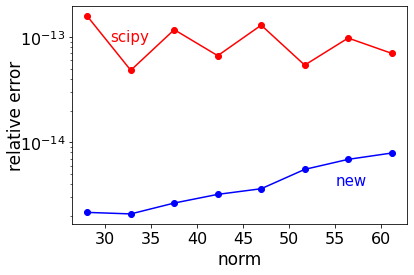

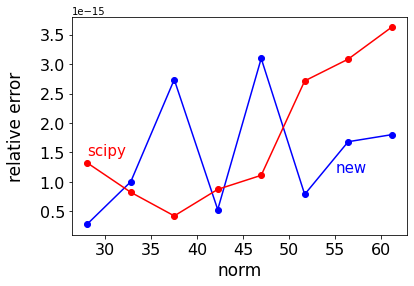

In [43]:
from qutip import qload
norm_der,norm,sc1,new1,sc,new=qload('qubits_exp')
import numpy as np
from scipy.sparse.linalg import expm_multiply,eigs
from scipy.special import factorial
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix,identity
from fractions import Fraction
from scipy.sparse import csr_matrix,isspmatrix,bmat,kron
import scipy as sci
from scipy.sparse import csr_matrix,isspmatrix,bmat
import scipy as sci
def get_creation_operator(size,tp):
    return np.diag(np.sqrt(np.arange(1, size),dtype=tp), k=-1)
def get_annihilation_operator(size,tp):
    return np.diag(np.sqrt(np.arange(1, size),dtype=tp), k=1)
def get_norm(dim):
    tp=np.float64
    anorm=[]
    for i in range(len(dim)):
        N=dim[i]
        control=get_control(N,tp)
        control_pra=0.5*np.ones(np.array(control).shape[0])
        H_control=control_H(control_pra,control)
        H=H_control+get_int(N,tp)
        anorm.append(overnorm(H))
    return anorm
def get_norm_der(dim):
    tp=np.float64
    anorm=[]
    for i in range(len(dim)):
        N=dim[i]
        control=get_control(N,tp)
        control_pra=0.5*np.ones(np.array(control).shape[0])
        H_control=control_H(control_pra,control)
        H=H_control+get_int(N,tp)
        vec=1/np.sqrt(2*2**N)*np.identity(2*2**N)
        A=block_fre(H,-1j*(control[0]))
        anorm.append(overnorm(A))
    return anorm
def get_int(N,tp):
    sigmap=get_creation_operator(2,tp)
    sigmam = get_annihilation_operator(2,tp)
    sigmaz=sigmap.dot(sigmam)
    H0=0
    SIGMAZ=kron(sigmaz,sigmaz)
    H0=H0+kron(SIGMAZ,identity(2**(N-2)))+kron(identity(2**(N-2)),SIGMAZ)
    for i in range(1,N-2):
        H0=H0+kron(kron(identity(2**i),SIGMAZ),identity(2 ** (N - 2 - i)))
    return H0
def get_control(N,tp):
    sigmap=get_creation_operator(2,tp)
    sigmam = get_annihilation_operator(2,tp)
    sigmap=sigmap
    sigmam=sigmam
    sigmax=sigmap+sigmam
    sigmay=-1j*sigmap+1j*sigmam
    control=[]
    if N==1:
        control.append(kron(sigmax, identity(2 ** (N - 1))))
        control.append(kron(sigmay, identity(2 ** (N - 1))))
        return control
    else:
        a=identity(2**(N-1))
        control.append(kron(sigmax,a,format="csc"))
        control.append(kron(sigmay, identity(2 ** (N - 1)),format="csc"))
        for i in range(1,N-1):
            control.append(kron(kron(identity(2**i),sigmax), identity(2 ** (N - 1-i)),format="csc"))
            control.append(kron(kron(identity(2 ** i), sigmay), identity(2 ** (N - 1 - i)),format="csc"))
        control.append(kron(identity(2**(N-1)),sigmax,format="csc"))
        control.append(kron(identity(2**(N-1)),sigmay,format="csc"))
    return control
def control_H(control,H_control):
    H=0
    for i in range(len(control)):
        H=H+control[i]*H_control[i]
    return H
def get_H(N,tp):
    control=get_control(N,tp)
    control_pra=0.5*2*np.pi*np.ones(np.array(control).shape[0])
    H_control=control_H(control_pra,control)
    H=-1j*(H_control+get_int(N,tp)*0.1*2*np.pi)
def overnorm(A):
    if A.dtype==np.complex256:
        return _exact_inf_norm(A)
    else:
        return norm_two(A)
def norm_two(A):
    if sci.sparse.isspmatrix(A):
        A=csr_matrix(A).conjugate().transpose()
        return np.sqrt(abs(eigs(A=A.dot(A),k=1,which='LM',return_eigenvectors=False)[0]))
    else:
        return np.linalg.norm(A)
def block_fre(A,E):
    if isspmatrix(A) is False:
        A = np.block([[A, E], [np.zeros_like(A), A]])
    else:
        A = bmat([[A, E], [None, A]]).tocsc()
    return A
dim=np.int64(np.array([6,7,8,9,10,11,12,13]))
x=norm
fig, ax = plt.subplots()
ax.plot(norm, new,color='blue',label='new')
ax.scatter(norm, new,color='blue')
ax.set_yscale('log')
ax.plot(norm, sc,color='red',label='scipy' )
ax.scatter(norm, sc,color='red' )
ax.set_xlabel("norm")
ax.set_ylabel('relative error')
ax.annotate('new',
      xy     = (     x[-1], new[-1]),
      xytext = (0.9*x[-1], 0.5*new[-1]),
      color  = 'blue',fontsize=15)
ax.annotate('scipy',
      xy     = (     x[1], sc[1]),
      xytext = (0.5*x[-1], 1.3*sc[-1]),
      color  = 'red',fontsize=15)
ax.yaxis.set_label_coords(-0.14, 0.5)
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gate_exp.pdf',bbox_inches="tight")
import matplotlib.pyplot as plt
x=norm_der
fig, ax = plt.subplots()
ax.plot(norm_der, new1,color='blue',label='new')
ax.scatter(norm_der, new1,color='blue')
#ax.set_yscale('log')
ax.plot(norm_der, sc1,color='red',label='scipy' )
ax.scatter(norm_der, sc1,color='red')
ax.annotate('new',
      xy     = (     x[-1], new1[-1]),
      xytext = (0.9*x[-1], 0.65*new1[-1]),
      color  = 'blue',fontsize=15)
ax.annotate('scipy',
      xy     = (     x[0], sc1[0]),
      xytext = (x[0], 1.1*sc1[0]),
      color  = 'red',fontsize=15)
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
ax.set_ylim(1*1e-16,None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel("norm")
ax.set_ylabel('relative error')
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.savefig('gate_der.pdf',bbox_inches="tight")

In [2]:
new

[1.7558409629603215656e-15,
 1.4174511269850180407e-15,
 2.5213401941597570208e-15,
 2.1157110175653830085e-15,
 1.5828057078542286863e-15,
 1.748929308017075923e-15,
 2.1729685678649059094e-15,
 3.1739290272799423802e-15,
 2.1921598051822468676e-15,
 1.9619892200349368363e-15]

Loaded list object.


(array([1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11]),
 [Text(0, 1e-16, '$\\mathdefault{10^{-16}}$'),
  Text(0, 1e-15, '$\\mathdefault{10^{-15}}$'),
  Text(0, 1e-14, '$\\mathdefault{10^{-14}}$'),
  Text(0, 1e-13, '$\\mathdefault{10^{-13}}$'),
  Text(0, 1e-12, '$\\mathdefault{10^{-12}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 0, '')])

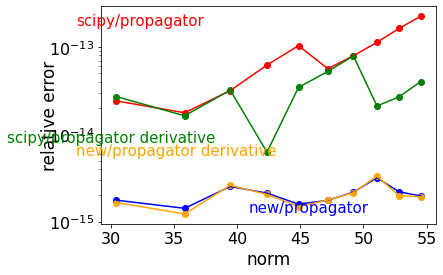

In [3]:
import numpy as np
from scipy.sparse.linalg import expm_multiply,eigs
from scipy.special import factorial
import matplotlib.pyplot as plt
from fractions import Fraction
from scipy.sparse import csr_matrix,isspmatrix,bmat
import scipy as sci
def get_creation_operator(size,tp):
    return np.diag(np.sqrt(np.arange(1, size),dtype=tp), k=-1)
def get_annihilation_operator(size,tp):
    return np.diag(np.sqrt(np.arange(1, size),dtype=tp), k=1)
def get_s(A,b,tol):
    s=1
    if A.dtype==np.complex256:
        s=np.ceil(overnorm(A))
    else:
        while(1):
            tol_power = np.ceil(np.log10(tol))
            norm_A = overnorm(A)/s
            norm_b= norm_state(b)
            max_term_notation=np.floor(norm_A)
            max_term=1
            for i in range(1,np.int(max_term_notation)):
                max_term=max_term*norm_A/i
                max_power = np.ceil(np.log10(max_term))
                if max_power>30:
                    break
            max_power = np.ceil(np.log10(max_term))
            if max_power-16<=tol_power:
                break
            s=s+1
    return s
def _expm_multiply_simple_core_global(A, B, tol=None):
    """
    A helper function.
    """
    if tol is None:
        tol =1e-16
    s=get_s(A,B,tol)
    F = B
    c1 = overnorm(B)
    j=0
    while(1):
        coeff = s*(j+1)
        B =  A.dot(B)/coeff
        c2 = overnorm(B)
        F = F + B
        total_norm=norm_state(F)
        if c2/total_norm<tol:
            m=j+1
            break
        c1 = c2
        j=j+1
    F =  F
    B = F
    for i in range(1,int(s)):
        c1 = norm_state(B)
        for j in range(m):
            coeff = s*(j+1)
            B =  A.dot(B)/coeff
            c2 =norm_state(B)
            F = F + B
            total_norm=norm_state(F)
            if c2/total_norm<tol:
                m=j+1
                break
            c1 = c2
            j=j+1
        F =  F
        B = F
    return F
def overnorm(A):
    if A.dtype==np.complex256:
        return _exact_inf_norm(A)
    else:
        return norm_two(A)
def _exact_inf_norm(A):
    # A compatibility function which should eventually disappear.
    if sci.sparse.isspmatrix(A):
        return max(abs(A).sum(axis=1).flat)
    else:
        return np.linalg.norm(A, np.inf)
def norm_two(A):
    if sci.sparse.isspmatrix(A):
        A=csr_matrix(A).conjugate().transpose()
        return np.sqrt(abs(eigs(A=A.dot(A),k=1,which='LM',return_eigenvectors=False)[0]))
    else:
        return np.linalg.norm(A)
def norm_state(A):
    return np.linalg.norm(A)
def block_fre(A,E):
    if isspmatrix(A) is False:
        A = np.block([[A, E], [np.zeros_like(A), A]])
    else:
        A = bmat([[A, E], [None, A]]).tocsc()
    return A
def difference(A,B):
    return overnorm(A-B)/overnorm(A)
def get_H(dim,tp):
    HILBERT_SIZE=dim
    Q_dim=6
    g=0.1*2*np.pi
    a_dag = get_creation_operator(HILBERT_SIZE,tp)
    a = get_annihilation_operator(HILBERT_SIZE,tp)
    b_dag=get_creation_operator(Q_dim,tp)
    b=get_annihilation_operator(Q_dim,tp)
    A=np.kron(a,np.identity(Q_dim))
    A_dag=np.kron(a_dag,np.identity(Q_dim))
    B=np.kron(np.identity(HILBERT_SIZE),b)
    B_dag=np.kron(np.identity(HILBERT_SIZE),b_dag)
    H0=g*(np.kron(a_dag,b)+np.kron(a,b_dag))
    H=H=csr_matrix(-1j*(H0+0.5*2*np.pi*(A+A_dag+B+B_dag+1j*(B-B_dag+A-A_dag))))
    vec=1/np.sqrt(HILBERT_SIZE*Q_dim)*np.identity(HILBERT_SIZE*Q_dim)
    return H,vec
def get_auxiliary(dim,tp):
    HILBERT_SIZE=dim
    Q_dim=6
    g=0.1*2*np.pi
    a_dag = get_creation_operator(HILBERT_SIZE,tp)
    a = get_annihilation_operator(HILBERT_SIZE,tp)
    b_dag=get_creation_operator(Q_dim,tp)
    b=get_annihilation_operator(Q_dim,tp)
    A=np.kron(a,np.identity(Q_dim))
    A_dag=np.kron(a_dag,np.identity(Q_dim))
    B=np.kron(np.identity(HILBERT_SIZE),b)
    B_dag=np.kron(np.identity(HILBERT_SIZE),b_dag)
    H0=g*(np.kron(a_dag,b)+np.kron(a,b_dag))
    H=csr_matrix(-1j*(H0+0.5*2*np.pi*(A+A_dag+B+B_dag+1j*(B-B_dag+A-A_dag))))
    vec=1/np.sqrt(2*HILBERT_SIZE*Q_dim)*np.identity(2*HILBERT_SIZE*Q_dim)
    A=block_fre(H,-1j*(A+A_dag))
    return A,vec
def get_norm(dim):
    tp=np.float64()
    anorm=[]
    for i in range(len(dim)):
        HILBERT_SIZE=int(dim[i])
        Q_dim=6
        g=0.1*2*np.pi
        a_dag = get_creation_operator(HILBERT_SIZE,tp)
        a = get_annihilation_operator(HILBERT_SIZE,tp)
        b_dag=get_creation_operator(Q_dim,tp)
        b=get_annihilation_operator(Q_dim,tp)
        A=np.kron(a,np.identity(Q_dim))
        A_dag=np.kron(a_dag,np.identity(Q_dim))
        B=np.kron(np.identity(HILBERT_SIZE),b)
        B_dag=np.kron(np.identity(HILBERT_SIZE),b_dag)
        H0=g*(np.kron(a_dag,b)+np.kron(a,b_dag))
        H=csr_matrix(-1j*(H0+0.5*2*np.pi*(A+A_dag+B+B_dag+1j*(B-B_dag+A-A_dag))))
        anorm.append(overnorm(H))
    return anorm
def get_norm_der(dim):
    tp=np.float64()
    anorm=[]
    for i in range(len(dim)):
        HILBERT_SIZE=int(dim[i])
        Q_dim=6
        g=0.1*2*np.pi
        a_dag = get_creation_operator(HILBERT_SIZE,tp)
        a = get_annihilation_operator(HILBERT_SIZE,tp)
        b_dag=get_creation_operator(Q_dim,tp)
        b=get_annihilation_operator(Q_dim,tp)
        A=np.kron(a,np.identity(Q_dim))
        A_dag=np.kron(a_dag,np.identity(Q_dim))
        B=np.kron(np.identity(HILBERT_SIZE),b)
        B_dag=np.kron(np.identity(HILBERT_SIZE),b_dag)
        H0=g*(np.kron(a_dag,b)+np.kron(a,b_dag))
        H=csr_matrix(-1j*(H0+0.5*2*np.pi*(A+A_dag+B+B_dag+1j*(B-B_dag+A-A_dag))))
        A=block_fre(H,-1j*(A+A_dag))
        anorm.append(overnorm(A))
    return anorm
from qutip import qload
der_norm,norm,sc1,new1,sc,new=qload('state_exp')
import matplotlib.pyplot as plt
dim=np.int64(np.linspace(10,210,11))
fig, ax = plt.subplots()
ax.plot(norm, new,color='blue',label='new')
ax.scatter(norm, new,color='blue')
ax.set_yscale('log')
ax.plot(norm, sc,color='red',label='scipy' )
ax.scatter(norm, sc,color='red' )
ax.yaxis.set_label_coords(-0.125, 0.5)
ax.annotate('new/propagator',
      xy     = (     norm[-1], new[-1]),
      xytext = (0.75*norm[-1], 0.65*new[-1]),
      color  = 'blue',fontsize=15)
ax.annotate('scipy/propagator',
      xy     = (     norm[6], sc[6]),
      xytext = (0.5*norm[-1], 0.8*sc[-1]),
      color  = 'red',fontsize=15)
ax.set_xlabel("norm")
ax.set_ylabel('relative error')
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('state_exp.pdf',bbox_inches="tight")

import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
ax.plot(norm, new1,color='orange')
ax.scatter(der_norm, new1,color='orange')
ax.set_yscale('log')
ax.plot(der_norm, sc1,color='green')
ax.scatter(der_norm, sc1,color='green')                
ax.set_xlabel("norm")
ax.set_ylabel('relative error')
ax.annotate('new/propagator derivative',
      xy     = (     der_norm[6], new1[6]),
      xytext = (0.5*der_norm[-1], 3*new1[-1]),
      color  = 'orange',fontsize=15)
ax.annotate('scipy/propagator derivative',
      xy     = (     der_norm[6], sc1[6]),
      xytext = (0.4*der_norm[-1], 0.2*sc1[-1]),
      color  = 'green',fontsize=15)
ax.xaxis.label.set_size(17)
ax.yaxis.set_label_coords(-0.125, 0.5)
ax.yaxis.label.set_size(17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig('state_der.pdf',bbox_inches="tight")


In [2]:
pulse1=qload('fock_pulse')

Loaded list object.


In [3]:
pulse=pulse1[0]

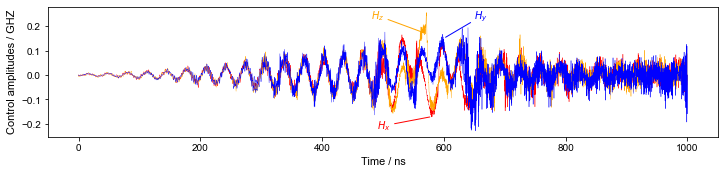

In [9]:
plt.figure(figsize=(12,5.27))
time=np.linspace(0, 1000, 4001, endpoint=False)
ax=plt.subplot(2,1,1)
ax.plot(np.linspace(0, 1000, 4001, endpoint=False),pulse[0]/(2*np.pi),color='red',linewidth=0.4)
ax.annotate('$H_x$',
      xy     = (     580, -0.17),
      xytext = (490, -0.22),
      color  = 'red',arrowprops=dict(arrowstyle="-"
                            ,color='red'))
ax.plot(np.linspace(0, 1000, 4001, endpoint=False),pulse[1]/(2*np.pi),color='orange',linewidth=0.4)
ax.annotate('$H_y$',
      xy     = (   600,0.15),
      xytext = (650,0.23),
      color  = 'blue',arrowprops=dict(arrowstyle="-"
                            ,color='blue'))

ax.plot(np.linspace(0, 1000, 4001, endpoint=False),pulse[2]/(2*np.pi),color='blue',linewidth=0.4)
ax.annotate('$H_z$',
      xy     = (   570,0.17),
      xytext = (480,0.23),
      color  = 'orange',arrowprops=dict(arrowstyle="-"
                            ,color='orange'))
ax.set_xlabel('Time / ns')
ax.set_ylabel('Control amplitudes / GHZ')
plt.savefig('fockss.pdf',bbox_inches="tight")

In [167]:
pulse[0]

array([ 0.        , -0.02503327, -0.0254391 , ..., -0.27790011,
       -0.24249468,  0.        ])

In [126]:
def Taylor(a):
    
    j = 1
    sum_ = 1
    b=1
    while(1):
        b = a*b/j
        if j == np.floor(abs(a)):
            max_ = abs(b)
        sum_ = sum_ + b
        if abs(b) <= 1e-16:
            break
        j = j + 1
        
    return sum_ , max_

In [127]:
def test(number):
    diff = np.zeros(len(number))
    maximum = np.zeros(len(number))
    for i in range(len(number)):
        value , max_ = Taylor(number[i])
        diff[i] = abs(value - np.exp(number[i]))
        maximum[i] = max_
    return diff, maximum

In [146]:
number = np.linspace(2j,30j,100)
diff ,maxixmum = test(number)

Text(0, 0.5, 'Abs error')

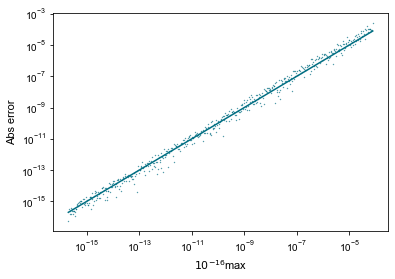

In [150]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(1e-16*maxixmum, diff,s=0.1)
ax.plot(1e-16*maxixmum, 1e-16*maxixmum,)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$10^{-16}$max')
ax.set_ylabel('Abs error')

In [131]:
diff ,1e-16*maxixmum

(array([1.17888545e-12]), array([8.71450115e-13]))

In [120]:
diff,max_=Taylor(11.2j)

In [123]:
abs(1e-16*max_)

8.714501145746933e-13